In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.datasets import load_boston
import pandas as pd

In [2]:
from sklearn import cluster
from sklearn.cluster import KMeans
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
   
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#setting OS

os.chdir('/Users/ruchikasi/Documents/Personal/Springboard/')

In [4]:
df = pd.read_csv('/Users/ruchikasi/Documents/Personal/Springboard/csdf.csv')

Exploring the shape and datatypes for the airbnb singapore listings dataset

**Data Wrangling Summary**

This Dataset is a listings dataset from AirBNB Singapore. The key features are neighbourhood descriptions, host id, listing id, room type , and other specifications around availability and minimum nights.

Data Cleaning Summarry:

Initial Steps: 
Summarized the dataset using methods like info,and describe to see which columns have missing values and which columns are not required for the analysis. The overall goal of my analysis two fold.
A) to understand if there are different cohorts of neighbourhoods in Singapore for AirBNB.
b) to understand what impacts price

Variable Elimination : some of the columns like name, host_id( as analysis is done at id level) are arbitrary and removed from analysis.

Variable Transformation: For , the two object type columns  neighbourhood_group and room_type - I created nominal variables so that they can be used in the analysis.

Variable Selection :I did not remove last_review and number of reviews is kept as my hypothesis is that listings with review are higher priced than listings without review. I plan to do a t-test before eliminating these columns as possible predictors for my analysis.

Outlier : analysis was done using z value for all continous variables. all rows with all of the z values > 3 were removed. i have not removed rows using individual outlier criteria and will do it later as I try out some models.

Outlier : I removed all listings with 0 avbailability. 



In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,Review_Recency,reviews_per_month,calculated_host_listings_count,availability_365
0,21408571,1 BR @ Little India & Farrer Park MRT,114674497,Mitul,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,NaN,0.51,6,351
1,18656726,Master Bedroom at The Clearwater Condo,21900076,Mary,East Region,Bedok,Shared room,14,1,0,NaN,NaN,NaN,2,0
2,37506711,Central 1BR Apt in Foodie Haven Hipster Paradise,29799617,John,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,NaN,4.00,1,34
3,35947264,Senja cozy,75175440,Rain,West Region,Bukit Panjang,Entire home/apt,14,1,1,6/24/19,NaN,0.45,2,0
4,18679631,Small room for you,108408404,Sutthida,Central Region,Marine Parade,Private room,14,2,1,5/14/17,NaN,0.04,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 15 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
Review_Recency                    0 non-null float64
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 926.7+ KB


total of 7907 rows and 15 columns. next step is to find total sum of na values per columns

In [7]:
df.isna().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
Review_Recency                    7907
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

** Findings of intial review of data 
*  Name as 2 missing names but that shoul not be an issue as we will be using id as our index for most analysis.

* Drop Review_Recency as it is totally blank.

* last review has 35% missing data. But would still like to use it as a variable as it may have an impact on price.

* last review and review per month are correlated as last review data is blank for all the listings with no review. I will keep the data as is for now and may impute missing values at the time of modelling




In [8]:
df.keys()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'Review_Recency',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Now let's explore the data set itself. 

In [9]:
# dropping variables which are not required.

#Fields not needed to our problem
to_drop = ["name","host_name", "Review_Recency",]
    
# Drop selected fields in place
df.drop(to_drop, inplace=True, axis=1)

In [11]:
#reviewing new dataset
df.head(3)

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21408571,114674497,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,0.51,6,351
1,18656726,21900076,East Region,Bedok,Shared room,14,1,0,NaN,NaN,2,0
2,37506711,29799617,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,4.00,1,34


In [12]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [13]:
#list of continuous variables
#list of continous columns
col = ['price','minimum_nights','number_of_reviews','availability_365','calculated_host_listings_count']

In [14]:

#plotting box plots to discover outliers

def drawhist(col):
    for i in col:
        sns.boxplot(x = df[i])
        
        plt.xlabel(i)
        plt.show()
    return()



/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


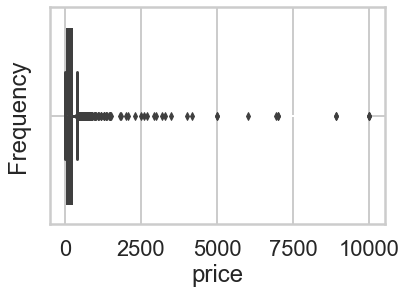

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


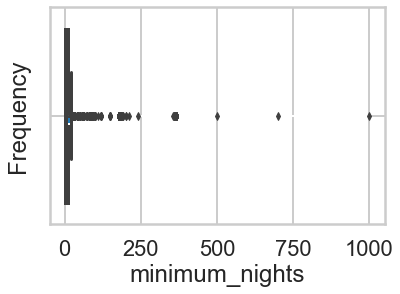

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


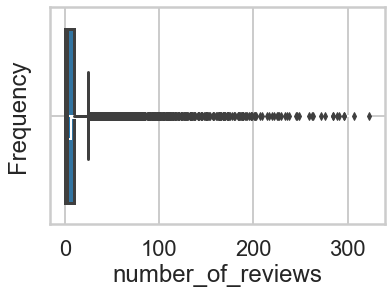

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


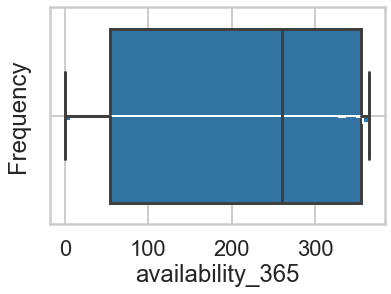

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


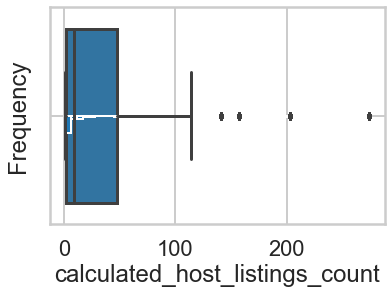

()

In [42]:
drawhist(col)

In [15]:
#using z scores to identify outliers

from scipy import stats
import numpy as np


In [16]:
#syntax : df = pd.DataFrame(data, columns = ['Name', 'Age'])


In [17]:
# writing a function to create additional columns in df for z values for each variable 
def zvalues(col):
    for i in col:
        z = pd.DataFrame(np.abs(stats.zscore(df[i])),columns = [i+" zval"])
        df[i+" zval"]= z[i+" zval"]
    return()

In [18]:
zvalues(col)

()

In [19]:
# removing outliers based on 3 variables i found relevant

df_o = df[(df['price zval']<3) & (df['minimum_nights zval']<3) & (df['availability_365 zval'] <3)]

In [20]:
df_o.shape

(7699, 17)

In [21]:
print((7907- 7699)/7907,"outliers removed")

0.02630580498292652 outliers removed


**The next set of code snippets is converting categorical variables into nominal-numerical variables after looking for missing values**

In [22]:
print(df_o.isnull().sum())

id                                        0
host_id                                   0
neighbourhood_group                       0
neighbourhood                             0
room_type                                 0
price                                     0
minimum_nights                            0
number_of_reviews                         0
last_review                            2613
reviews_per_month                      2613
calculated_host_listings_count            0
availability_365                          0
price zval                                0
minimum_nights zval                       0
number_of_reviews zval                    0
availability_365 zval                     0
calculated_host_listings_count zval       0
dtype: int64


In [23]:
# Converting last_review to datetime

df_o['last_rev'] =  pd.to_datetime(df_o['last_review'], infer_datetime_format=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
df_o.dtypes

id                                              int64
host_id                                         int64
neighbourhood_group                            object
neighbourhood                                  object
room_type                                      object
price                                           int64
minimum_nights                                  int64
number_of_reviews                               int64
last_review                                    object
reviews_per_month                             float64
calculated_host_listings_count                  int64
availability_365                                int64
price zval                                    float64
minimum_nights zval                           float64
number_of_reviews zval                        float64
availability_365 zval                         float64
calculated_host_listings_count zval           float64
last_rev                               datetime64[ns]
dtype: object

In [25]:
#using catcodes to code the variable

df_o['neighbourhood_group'] = df_o['neighbourhood_group'].astype('category')
df_o['neighbourhood'] = df_o['neighbourhood'].astype('category')
df_o['room_type'] = df_o['room_type'].astype('category')

df_o['ng'] = df_o['neighbourhood_group'].cat.codes
df_o['nb'] = df_o['neighbourhood'].cat.codes
df_o['room_t'] = df_o['room_type'].cat.codes

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [32]:
# function to plot histograms for continuos variables

#list of continous columns
col = ['price','minimum_nights','number_of_reviews','availability_365','calculated_host_listings_count']

def drawhist(col):
    for i in col:
        df[i].plot(kind = 'hist',bins = 50,normed = True)
        plt.xlabel(i)
        plt.show()
    return()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


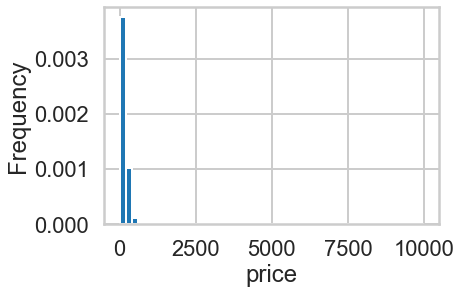

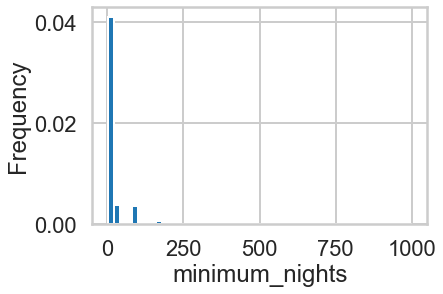

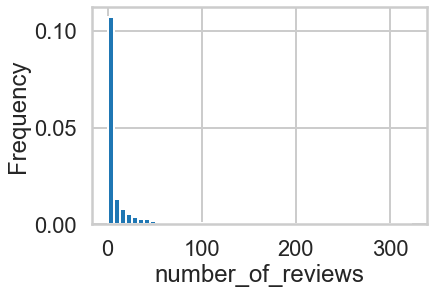

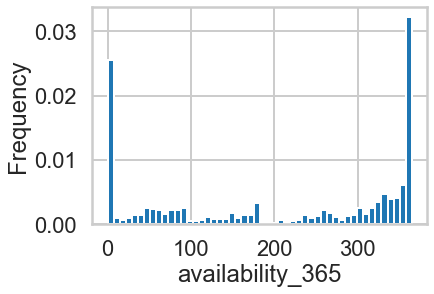

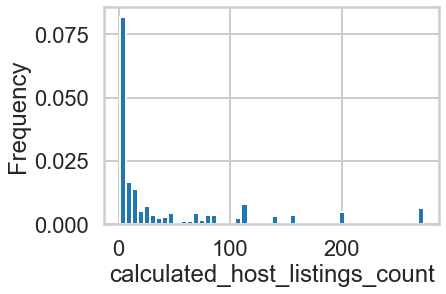

()

In [33]:
drawhist(col)

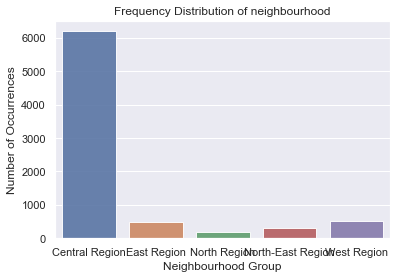

In [34]:
# cross tab for categorical variables
ng_count = df_o['neighbourhood_group'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ng_count.index, ng_count.values, alpha=0.9)
plt.title('Frequency Distribution of neighbourhood')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.show()

In [954]:
# exporting to view in tablea

df_o.to_csv("df_capst.csv",index=False)

## CAPTSTONE INFERENTIAL STATS - SECTION ##

**APPROACH**

As I reviewed the dataset and looked at some preliminary box plots and histograms, I built the following hypthesis which I wanted to validate. See below


**HYPOTHESIS 1**

34% of the listings did not have any review and NaN in last review data and reviews per month. So I wanted to test if not having reviews has a significant impact on price given all things constant. My null hypothesis : Not having reviews has no impact on the median price of the listing. I ran a t-test to find out if my null hypothesis is valid or not.
 

In [26]:
#importing file from DataWrangling Section : 
df_o= pd.read_csv('/Users/ruchikasi/Documents/Personal/Springboard/df_capst.csv')

In [27]:
df_o.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,...,price zval,minimum_nights zval,number_of_reviews zval,availability_365 zval,calculated_host_listings_count zval,last_rev,ng,nb,room_t,rev_flag
0,21408571,1 BR @ Little India & Farrer Park MRT,114674497,Mitul,0,29,0,0,3,9,...,0.497795,0.344723,0.128169,0.973738,0.531354,2019-08-11,0,29,0,1
1,18656726,Master Bedroom at The Clearwater Condo,21900076,Mary,1,1,2,14,1,0,...,0.456639,0.392238,0.431140,1.428548,0.592769,NaN,1,1,2,0
2,37506711,Central 1BR Apt in Foodie Haven Hipster Paradise,29799617,John,0,11,0,14,3,4,...,0.456639,0.344723,0.296486,1.195848,0.608122,2019-08-26,0,11,0,1
3,35947264,Senja cozy,75175440,Rain,4,5,0,14,1,1,...,0.456639,0.392238,0.397477,1.428548,0.592769,2019-06-24,4,5,0,1
4,18679631,Small room for you,108408404,Sutthida,0,19,1,14,2,1,...,0.456639,0.368480,0.397477,1.428548,0.608122,2017-05-14,0,19,1,1


In [28]:
#Creating a new variable "Rev_Flag : 1 for some review , 0 for no review

df_o['rev_flag'] = np.where(df_o['reviews_per_month'] > 0, 1, 0)

In [29]:
df_o['rev_flag'].value_counts()

1    5086
0    2613
Name: rev_flag, dtype: int64

In [30]:
rev_0 = df_o.loc[df_o.rev_flag == 0,'price']
rev_1 = df_o.loc[df_o.rev_flag == 1,'price']

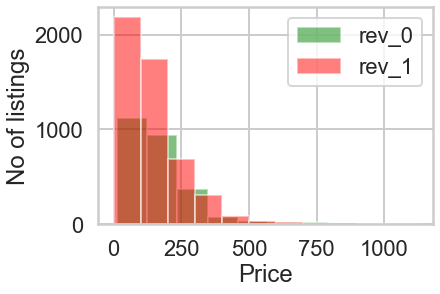

In [31]:
_ = plt.hist(rev_0, color = 'green', alpha = 0.5)
_ = plt.hist(rev_1, color = 'red', alpha = 0.5)
_ = plt.xlabel('Price')
_ = plt.ylabel('No of listings')
_ = plt.legend(['rev_0', 'rev_1'])


In [32]:
print('Mean of non review and some review listing prices are {:.2f} and {:.2f} dollars.'.format(np.median(rev_0), np.median(rev_1)))

Mean of non review and some review listing prices are 137.00 and 118.00 dollars.


The bar charts overlap but it looks like listings with reviews overindex on lower prices. But that may be a bias for occupying and reviewing lower priced listings.

In [33]:
alpha = 0.05

In [34]:
#Run two sample t test, because sample sizes are smaller now. 
t, p = stats.ttest_ind(rev_0, rev_1)
print('t = {}\tp = {}'.format(t, p))
if p < alpha:
    print('Null hypothesis rejected.')
else:
    print('Null hypothesis cannot be rejected')

t = 8.194987645288192	p = 2.911657896745438e-16
Null hypothesis rejected.


**HYPOTHESIS 1 CONCLUSION**
Both the grops seem to have signficantly different prices so I decided to not eliminate the variable

**HYPOTHESIS 2**

Before analyzing the relationship between other independent factors and price, I wanted to check for correlation amongst independent variables. Next section of code will analyse the correlation amongst independent variables.

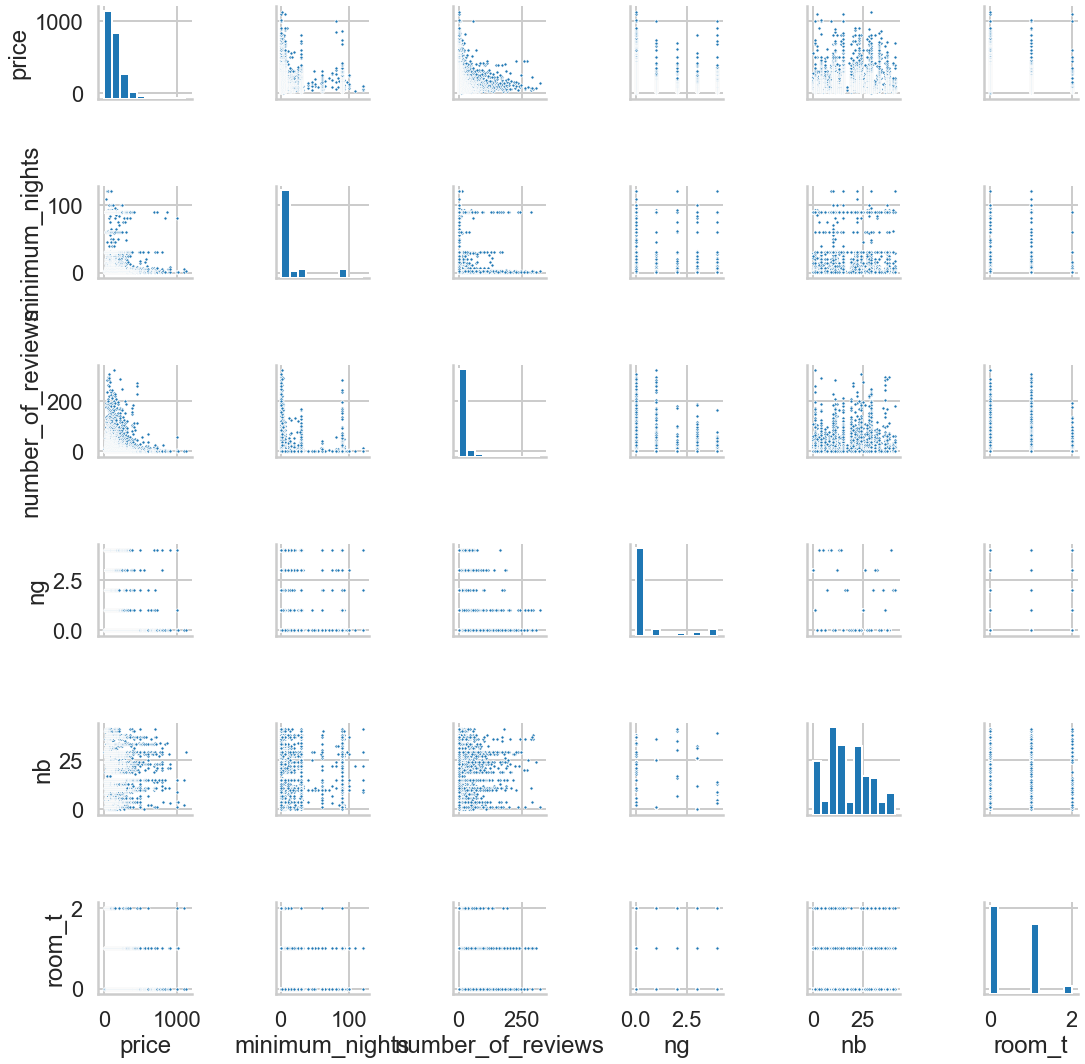

In [35]:
#building correlationplots for all variables

#Plot correlations of predictors
_ = sns.pairplot(df_o, vars = ['price', 'minimum_nights', 'number_of_reviews', 'ng','nb','room_t'], plot_kws={"s": 10})

The correlation shows that number of reviews seem slightly negatively correlated but not in a linear relationship.
The correlation also shows that room type 2 has lower price than room type 0 and 1. Room type 2 also has lower number of reviews overall compared to room type 0 and 1.

The independent variables don't seem to be correlated

Before doing any further feature engineering , I have decided to create an initial model and see if some of the above variables explain the variance in price.

In [36]:
#exporting dataset for next section
df_o.to_csv("df_capst.csv",index=False)

## Linear Regression Training and Validation Code to predict price based on available features

**Approach**

- Coding categorical variables
- Building a basic model
- Validating it using a test - train dataset
- Validating using K fold cross validatin
- Enhancing the model using variable transformation
-

In [177]:
#importing file from DataWrangling Section : 
df_o= pd.read_csv('/Users/ruchikasi/Documents/Personal/Springboard/df_capst.csv')

In [178]:
from sklearn import preprocessing

In [179]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder() 

In [180]:
# Fit label encoder

le.fit(df_o['neighbourhood_group'])
df_o['neighbourhood_group']=le.transform(df_o['neighbourhood_group'])

In [181]:
le.fit(df_o['neighbourhood'])
df_o['neighbourhood']=le.transform(df_o['neighbourhood'])

In [182]:
le.fit(df_o['room_type'])
df_o['room_type']=le.transform(df_o['room_type'])



**USING STATSMODEL TO BUILD THE SAME MODEL SO THAT I CAN READ MODEL OUTPUT EASILY**

In [183]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

In [184]:
X_sm = df_o

In [185]:
X_train_sm, X_test_sm = train_test_split(X_sm ,test_size=0.5, random_state=101)

In [186]:
X_train_sm.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,...,price zval,minimum_nights zval,number_of_reviews zval,availability_365 zval,calculated_host_listings_count zval,last_rev,ng,nb,room_t,rev_flag
3229,29424787,studio unit for rent-katong area,32184450,Apollo,0,11,0,101,1,4,...,0.200881,0.392238,0.296486,1.069556,0.405218,2019-08-06,0,11,0,1
5346,27345919,Studio Serviced Apartment near One North MRT,151196270,Jhian,0,27,0,175,89,0,...,0.016660,1.698423,0.431140,1.049024,0.067438,NaN,0,27,0,0
2309,50646,Pleasant Room along Bukit Timah,227796,Sujatha,0,6,1,81,90,18,...,0.259676,1.722181,0.174801,1.069556,0.608122,2014-12-26,0,6,1,1
5279,24313525,2 rooms/4 people near Mustafa Center,108773366,RedDoorz,0,15,1,169,1,1,...,0.000979,0.392238,0.397477,1.069556,1.050071,2019-06-16,0,15,1,1
6362,9778024,"WOW 4BRs, Near MRT, Cozy Apartment@Geylang",26234826,Andy,0,11,0,240,2,169,...,0.207743,0.368480,5.257972,0.617844,0.592769,2019-08-26,0,11,0,1


In [187]:

m = ols('price ~ id+host_id+neighbourhood+neighbourhood_group+room_type+minimum_nights+number_of_reviews+rev_flag+availability_365',X_train_sm).fit()
print(m.summary())
# 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     161.5
Date:                Tue, 07 Jan 2020   Prob (F-statistic):          5.52e-260
Time:                        10:38:03   Log-Likelihood:                -23454.
No. Observations:                3849   AIC:                         4.693e+04
Df Residuals:                    3839   BIC:                         4.699e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             203.5493    

In [188]:
m.predict()

array([220.46109079, 207.6073715 ,  70.52457316, ...,  90.83673281,
        72.10178459, 128.66065929])

In [189]:
X_test_sm.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'Review_Recency',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price zval', 'minimum_nights zval',
       'number_of_reviews zval', 'availability_365 zval',
       'calculated_host_listings_count zval', 'last_rev', 'ng', 'nb', 'room_t',
       'rev_flag'],
      dtype='object')

In [190]:
X_test_sm_a = X_test_sm.drop(columns = 'price')

In [191]:
ytestpred = pd.DataFrame({'test_pred':m.predict(X_test_sm_a)})

In [192]:
ytestpred.shape

(3850, 1)

In [193]:
ytrainpred = pd.DataFrame({'train_pred':m.predict()})

In [194]:
ytrainpred.shape

(3849, 1)

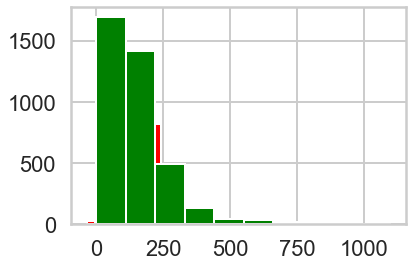

In [195]:
_ = plt.hist(ytestpred['test_pred'], color = 'red')
_ = plt.hist(X_test_sm['price'], color = 'green')

In [196]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [197]:
rms = sqrt(mean_squared_error(ytestpred.test_pred, X_test_sm.price))

In [198]:
print (rms)

99.94429314033425


In [199]:
#Checking for outliers on target variable
np.mean(df_o['price'])

152.7701000129887

In [200]:
np.median(X_test_sm.price)

122.0

In [201]:
np.median(ytestpred.test_pred)

170.2118891785966

In [202]:
y_true = X_test_sm.price
y_pred = ytestpred.test_pred

(array([ 25.,  67., 154., 423., 666., 440., 283., 691., 821., 280.]),
 array([-35.94960144,  -5.2568798 ,  25.43584185,  56.12856349,
         86.82128513, 117.51400677, 148.20672841, 178.89945005,
        209.59217169, 240.28489333, 270.97761497]),
 <a list of 10 Patch objects>)

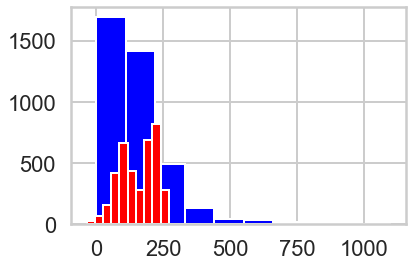

In [203]:
# on test data set
plt.hist(y_true,color = 'blue')
plt.hist(y_pred,color = 'red')

In [208]:
residual = y_true - y_pred

In [205]:
rms = sqrt(mean_squared_error(y_true, y_pred))

In [209]:
print(rms)

99.94429314033425


Text(0, 0.5, 'residual')

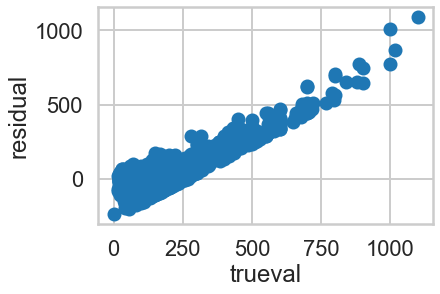

In [210]:
plt.scatter(y_true,residual)
plt.xlabel("trueval")
plt.ylabel("residual")

 The model is not predicting higher error values. So trying to identify what is different abiout higher price value and checking if the model predicts better for lower price.

### Training a model on all listings priced < 300 USD

In [211]:
X_sm_p1 = X_sm[X_sm['price'] <= 300]

In [212]:
X_sm_p1.shape

(7063, 25)

In [213]:
X_train_sm, X_test_sm = train_test_split(X_sm_p1,test_size=0.5, random_state=101)

In [214]:
X_train_sm.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,...,price zval,minimum_nights zval,number_of_reviews zval,availability_365 zval,calculated_host_listings_count zval,last_rev,ng,nb,room_t,rev_flag
4066,27790457,♪Cityfringe Cozy Loft @ MRT (rg2),31464513,Darcy,0,15,0,131,10,2,...,0.112689,0.178420,0.363813,1.069556,1.126839,2019-07-30,0,15,0,1
3029,35900603,100% Private Studio Apartment (Blue Line MRT),230280001,Stacy,0,6,0,99,4,2,...,0.206761,0.320965,0.363813,0.901551,0.347110,2019-08-16,0,6,0,1
4494,27823327,"Entire Studio Apartment nearby MRT, shops, eat...",119613097,Su Moy,0,29,0,140,2,1,...,0.086231,0.368480,0.397477,0.994271,0.208928,2018-10-28,0,29,0,1
4577,32223363,Sleek & Modern 2BR APT 5 mins from Bishan MRT,66406177,Jay,0,2,0,144,30,0,...,0.074472,0.296730,0.431140,0.652065,3.583422,NaN,0,2,0,0
3394,5899156,Studio near to the City (Opposite Chinatown MRT),14521708,Shirley,0,24,0,110,5,34,...,0.174424,0.297208,0.713415,0.573033,0.405218,2019-08-03,0,24,0,1


In [215]:
# Take the reduced model from Part 3
m = ols('price ~ id+host_id+neighbourhood+neighbourhood_group+room_type+minimum_nights+number_of_reviews+rev_flag+availability_365',X_train_sm).fit()
print(m.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 07 Jan 2020   Prob (F-statistic):               0.00
Time:                        10:40:41   Log-Likelihood:                -19088.
No. Observations:                3531   AIC:                         3.820e+04
Df Residuals:                    3521   BIC:                         3.826e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             168.7469    

In [216]:
m.predict()

array([178.34231677, 164.23731147, 188.94805768, ...,  83.96396096,
        74.09839771, 103.96953713])

In [217]:
X_test_sm.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'Review_Recency',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price zval', 'minimum_nights zval',
       'number_of_reviews zval', 'availability_365 zval',
       'calculated_host_listings_count zval', 'last_rev', 'ng', 'nb', 'room_t',
       'rev_flag'],
      dtype='object')

In [218]:
X_test_sm_a = X_test_sm.drop(columns = 'price')

In [219]:
ytestpred = pd.DataFrame({'test_pred':m.predict(X_test_sm_a)})

In [220]:
ytestpred.shape

(3532, 1)

In [221]:
ytrainpred = pd.DataFrame({'train_pred':m.predict()})

In [222]:
ytrainpred.shape

(3531, 1)

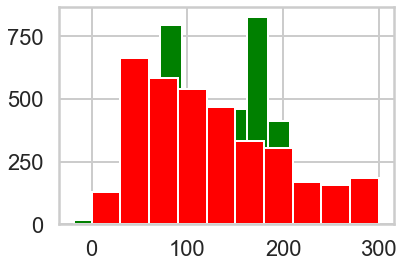

In [223]:
_ = plt.hist(ytestpred['test_pred'], color = 'green')
_ = plt.hist(X_test_sm['price'], color = 'red')

In [224]:
rms = sqrt(mean_squared_error(ytestpred.test_pred, X_test_sm.price))

In [225]:
print (rms)

53.39166996040071


1. price < 771 (upper whisker) - rms 89
2. price < 500 ( upper hinge)  - rms 71
3. price < 300                 - rms 50       


On further data inspection, found out that 92% of datapoints < 300 dollars so proceeding with improving the model for all listings less than 300 dollars

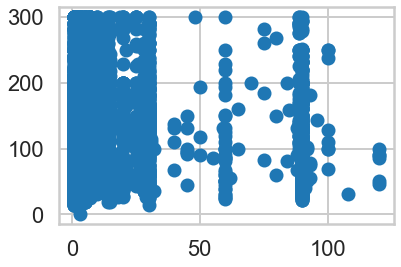

In [226]:
#analyzing the relation of other features to price for all listings less than $300

plt.scatter(X_sm_p1.minimum_nights,X_sm_p1.price)


In [228]:
table = pd.pivot_table(X_sm_p1, values='id', index=['neighbourhood_group','room_type']
                              , aggfunc='count', fill_value=0)

In [229]:
print(table)

                                 id
neighbourhood_group room_type      
0                   0          3193
                    1          2104
                    2           341
1                   0           114
                    1           347
                    2             8
2                   0            46
                    1           121
                    2             8
3                   0            52
                    1           246
                    2             9
4                   0           108
                    1           351
                    2            15


In [230]:
table['% of Total'] = (table.id / table.id.sum() * 100)
table['% of roomtype'] = (table.id / table.groupby(level=0).id.transform(sum) * 100)
table.loc['total', :] = table.sum().values
print (table)

                                   id  % of Total  % of roomtype
neighbourhood_group room_type                                   
0                   0          3193.0   45.207419      56.633558
                    1          2104.0   29.789041      37.318198
                    2           341.0    4.827977       6.048244
1                   0           114.0    1.614045      24.307036
                    1           347.0    4.912927      73.987207
                    2             8.0    0.113266       1.705757
2                   0            46.0    0.651281      26.285714
                    1           121.0    1.713153      69.142857
                    2             8.0    0.113266       4.571429
3                   0            52.0    0.736231      16.938111
                    1           246.0    3.482939      80.130293
                    2             9.0    0.127425       2.931596
4                   0           108.0    1.529095      22.784810
                    1    

Note : based on above cross tab room type 0 constitutes greater share of neighbour hood group 0 so making a dummy variable for neighbour group 0 versus others

In [231]:
X_sm_p1['ng_flag'] = np.where(X_sm_p1['neighbourhood_group']== 0,1,0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


No change in RMS by adding this new flag

### TRYING MODELLING ANd KFOLD CROSS VALIDATION USING SCIKIT LEARN FOR LISTINGS PRICED LESS THAN USD 300

In [232]:
df_oo = df_o[df['price']<= 300]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [233]:
df_oo.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,...,price zval,minimum_nights zval,number_of_reviews zval,availability_365 zval,calculated_host_listings_count zval,last_rev,ng,nb,room_t,rev_flag
0,21408571,1 BR @ Little India & Farrer Park MRT,114674497,Mitul,0,29,0,0,3,9,...,0.497795,0.344723,0.128169,0.973738,0.531354,2019-08-11,0,29,0,1
1,18656726,Master Bedroom at The Clearwater Condo,21900076,Mary,1,1,2,14,1,0,...,0.456639,0.392238,0.431140,1.428548,0.592769,NaN,1,1,2,0


In [234]:
from sklearn.linear_model import LinearRegression
X = df_oo.drop(['id','name','host_name','price','last_review',
               'price zval','minimum_nights zval',
               'availability_365 zval',
               'calculated_host_listings_count zval',
               'last_rev','reviews_per_month',
               'number_of_reviews zval','ng','nb','room_t','Review_Recency'], axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [235]:
X.head()

,host_id,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rev_flag
0,114674497,0,29,0,3,9,6,351,1
1,21900076,1,1,2,1,0,2,0,0
2,29799617,0,11,0,3,4,1,34,1
3,75175440,4,5,0,1,1,2,0,1
4,108408404,0,19,1,2,1,1,0,1


In [236]:
# Use all 13 predictors to fit linear regression model
a = lm.fit(X, df_oo.price)

In [237]:
# your turn
lm.coef_
lm.intercept_

168.3229660228693

In [238]:
lm.coef_

array([ 3.66489464e-08, -4.29459766e+00,  2.57622609e-01, -8.25521772e+01,
       -4.12379173e-01, -8.81629193e-02, -1.98024945e-02,  7.94914207e-02,
       -1.11309074e+01])

In [239]:
# MAKING A DATAFRAME WITH THE COEFFICIENTS#
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,host_id,3.664895e-08
1,neighbourhood_group,-4.294598e+00
2,neighbourhood,2.576226e-01
3,room_type,-8.255218e+01
4,minimum_nights,-4.123792e-01
5,number_of_reviews,-8.816292e-02
6,calculated_host_listings_count,-1.980249e-02
7,availability_365,7.949142e-02
8,rev_flag,-1.113091e+01


In [240]:
#making y dataset to create test and train samples

y = df_oo['price']

Now splitting training and testing dataset and trying the model

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [243]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
predicts = lm.predict(X_test)
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
error_airbnb.head()

,Actual Values,Predicted Values
0,139,204.546281
1,200,201.981001
2,94,159.285020
3,100,154.723189
4,100,164.362639


In [245]:
from sklearn.metrics import mean_squared_error

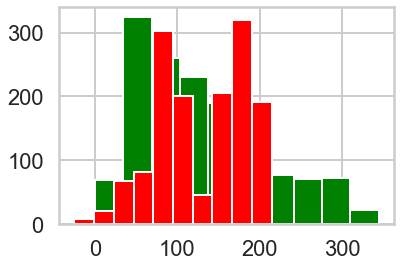

In [246]:
_ = plt.hist(y_test, color = 'green')
_ = plt.hist(predicts, color = 'red')

In [247]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predicts)

45.175677427413625

In [248]:
from sklearn.metrics import r2_score
r2_score(y_test,predicts) #r2 is 0.43

0.43091784871268846

In [249]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predicts))

In [250]:
print(rms)

57.992510491728204


In [251]:
error_airbnb.to_csv("lm_error1.csv",index=False)

Attempting K Fold Cross Validation to see if the model is overfitting or under fitting

In [253]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits = 10) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator



print(kf) 


#splitting y into n folder

for train, test in kf.split(X):
	print('train: %s, test: %s' % (train, test))

#splitting y into n folders

for train, test in kf.split(y):
	print('train: %s, test: %s' % (train, test))

In [255]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model

In [256]:
def get_score(model,X_train, X_test,y_train,y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

In [257]:
get_score(LinearRegression(),X_train, X_test,y_train,y_test)
#getting scores(r2) for 5 kfolds

0.43091784871268846

In [258]:
scores_lr = cross_val_score(LinearRegression(),X,y,cv = 10, scoring = 'neg_mean_absolute_error')
print(scores_lr)
np.mean(scores_lr)*-1

[ -40.85238379  -39.66792405  -30.19379829  -32.60577811  -50.18655098
  -52.50460367  -38.59516535  -26.44677144  -62.00624395 -138.93710654]


51.19963261680637

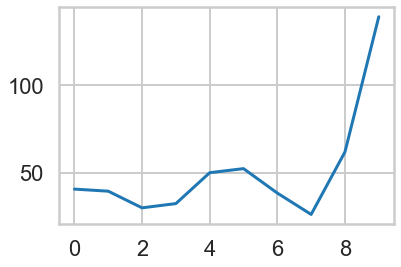

In [259]:
#plotting linear reg cross val scores
plt.plot(-1*scores_lr)

the error becomes huge for when for last 2ks

In [260]:
get_score(linear_model.Lasso(),X_train, X_test,y_train,y_test)
#getting scores for 5 kfolds

0.4332635018044829

In [261]:
scores_lass = cross_val_score(linear_model.Lasso(),X,y, cv = 10,scoring = 'neg_mean_absolute_error')
print(scores_lass)
np.mean(scores_lass)*-1

[ -43.6238661   -41.09723214  -31.15443172  -32.49870272  -48.96847365
  -51.24793047  -37.44233075  -26.23398239  -63.74587163 -140.64618792]


51.66590094780413

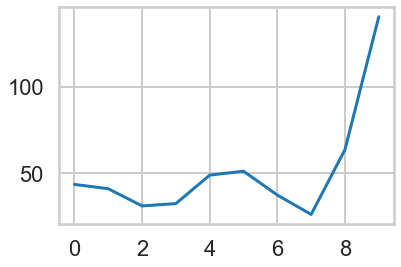

In [262]:
#plotting lass reg scores

plt.plot(-1*scores_lass)

#### Summary of KFold 

Both lasso and lin reg's mean error is around 51 but error increases for the last fold. So now I will try to tune my parameters to see which parameters impact my MAE / model most



### Parameter tuning for Linear Regression Model

In [264]:
#reviewing the parameters

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7224 entries, 0 to 7223
Data columns (total 9 columns):
host_id                           7224 non-null int64
neighbourhood_group               7224 non-null int64
neighbourhood                     7224 non-null int64
room_type                         7224 non-null int64
minimum_nights                    7224 non-null int64
number_of_reviews                 7224 non-null int64
calculated_host_listings_count    7224 non-null int64
availability_365                  7224 non-null int64
rev_flag                          7224 non-null int64
dtypes: int64(9)
memory usage: 564.4 KB


In [265]:
param_range = list(range(1,len(X.columns)+1))


In [266]:
# running a loop to see which additional variables linearly is reducing error most.
mean_scores = []

for i in param_range:
    x = X.iloc[:,0:i]
    y = y
    lr = LinearRegression()
    scores = cross_val_score(lr,x,y,cv = 10,scoring ='neg_mean_absolute_error')
    mean_scores.append(scores.mean())
    
print(mean_scores)
    

[-70.2165273195229, -68.22719003736115, -68.27965975941444, -52.56724987183195, -52.03695261461144, -51.98351470754576, -52.2671433445292, -51.4405525923411, -51.19963261680637]


0:1 -> host_id                                    = 70
0:2 -> host_id + neigbourhood_group               = 68.227
0:3 -> host_id + neigbourhood_group+neighbourhood = 68.28
0:4 -> host_id + neigbourhood_group++neighbourhood+room_type = -52.5
0:5 -> host_id + neigbourhood_group++neighbourhood+room_type+minimum_nights = -52.04
0:6 -> host_id + neigbourhood_group++neighbourhood+room_type+minimum_nights+number_reviews = -51.9
0:7 -> host_id + neigbourhood_group++neighbourhood+room_type+minimum_nights+number_reviews+host_listings_count = 52.26
0:8 ->host_id+neigbourhood_group++neighbourhood+room_type+minimum_nights+number_reviews+host_listings_count+availability = 51.44
0:9 >host_id+neigbourhood_group++neighbourhood+room_type+minimum_nights+number_reviews+host_listings_count+availability+rev_flag = 51.199

Based on the above train a model with most important variables that reduce mae or in other words did not add anything

In [267]:
X.head()

,host_id,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rev_flag
0,114674497,0,29,0,3,9,6,351,1
1,21900076,1,1,2,1,0,2,0,0
2,29799617,0,11,0,3,4,1,34,1
3,75175440,4,5,0,1,1,2,0,1
4,108408404,0,19,1,2,1,1,0,1


In [268]:
#drop neigbourhood,listings_count
from sklearn.linear_model import LinearRegression
X_n = X.drop(['neighbourhood','calculated_host_listings_count'], axis = 1)

In [269]:
#checking for cross val scores using new dataset with reduced variables
scores_lr_n = cross_val_score(LinearRegression(),X_n,y,cv = 10, scoring = 'neg_mean_absolute_error')
print(scores_lr_n)
np.mean(scores_lr_n)*-1

[ -40.61377641  -39.75184849  -29.91620627  -32.51535673  -50.22539243
  -52.48560717  -38.25586442  -26.39252935  -62.06616173 -138.98583007]


51.120857306202915

**MAE reduced from 51.66 to 51.12 after tuning parameters**

####  UNDERSTANDING FEATURES MORE TO SEE IF MODEL CAN BE ENHANCED

In [270]:
a = lm.fit(X_n, y)
lm.coef_
lm.intercept_

171.51043983270725

In [271]:
lm.coef_

array([ 3.87497520e-08, -4.55009569e+00, -8.14337239e+01, -4.14260247e-01,
       -7.94972178e-02,  7.74575946e-02, -1.08111920e+01])

In [272]:
# MAKING A DATAFRAME WITH THE COEFFICIENTS#
pd.DataFrame({'features': X_n.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]


,features,estimatedCoefficients
0,host_id,3.874975e-08
1,neighbourhood_group,-4.550096e+00
2,room_type,-8.143372e+01
3,minimum_nights,-4.142602e-01
4,number_of_reviews,-7.949722e-02
5,availability_365,7.745759e-02
6,rev_flag,-1.081119e+01


In [273]:
#Trying to see other feature patterns that may help optimize the model

X_corr = X_n

X_corr['price'] = df_oo['price']

In [274]:
corr_tab = X_corr.corr()

In [275]:
corr_tab.head(20)

,host_id,neighbourhood_group,room_type,minimum_nights,number_of_reviews,availability_365,rev_flag,price
host_id,1.000000,-0.013517,-0.076691,-0.080414,-0.176793,0.033948,-0.198692,0.123357
neighbourhood_group,-0.013517,1.000000,0.186252,0.002815,-0.046732,-0.089712,-0.012951,-0.195800
room_type,-0.076691,0.186252,1.000000,-0.024950,0.021382,0.037770,0.043594,-0.632467
minimum_nights,-0.080414,0.002815,-0.024950,1.000000,-0.094432,0.183110,-0.162245,-0.078532
number_of_reviews,-0.176793,-0.046732,0.021382,-0.094432,1.000000,-0.061981,0.313871,-0.065125
availability_365,0.033948,-0.089712,0.037770,0.183110,-0.061981,1.000000,-0.057588,0.111448
rev_flag,-0.198692,-0.012951,0.043594,-0.162245,0.313871,-0.057588,1.000000,-0.096697
price,0.123357,-0.195800,-0.632467,-0.078532,-0.065125,0.111448,-0.096697,1.000000


Neighbourhood grop and room types are slightly correlated with 0.18
room type and price are most correlated at -0.63
min nights and availability_365 are slightly correlated 
MOST CORRELATED WITH PRICE ARE NEIGHBOURHOOD GROUP AND ROOM TYPE WHICH ARE BOTH CATEGORICAL VARIABLES AND EXPLAIN THE PRICE VARIANCE

In [1279]:
#trying log transformation for number of reviews 



In [276]:
y.describe()

count    7224.000000
mean      130.250969
std        77.901684
min         0.000000
25%        64.000000
50%       118.000000
75%       181.000000
max       349.000000
Name: price, dtype: float64

(array([6.347e+03, 4.930e+02, 1.890e+02, 8.200e+01, 4.100e+01, 3.800e+01,
        1.600e+01, 7.000e+00, 6.000e+00, 5.000e+00]),
 array([  0. ,  32.3,  64.6,  96.9, 129.2, 161.5, 193.8, 226.1, 258.4,
        290.7, 323. ]),
 <a list of 10 Patch objects>)

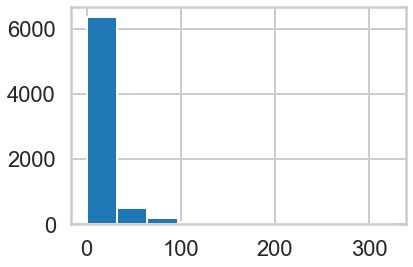

In [277]:
plt.hist(X_n.number_of_reviews)

In [134]:
review_log = np.log(X_corr.number_of_reviews+1)
minights_log = np.log(X_corr.minimum_nights +1)

(array([2434., 1561.,  581.,  732.,  466.,  560.,  419.,  292.,  132.,
          47.]),
 array([0.        , 0.57807435, 1.1561487 , 1.73422305, 2.31229741,
        2.89037176, 3.46844611, 4.04652046, 4.62459481, 5.20266916,
        5.78074352]),
 <a list of 10 Patch objects>)

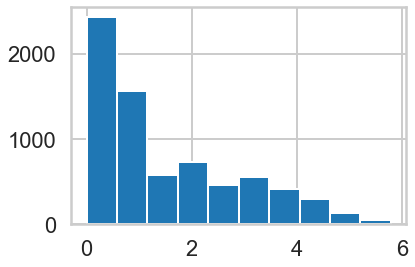

In [278]:
plt.hist(review_log)


(array([3187., 1064.,  590.,  565.,  257.,  361.,  557.,   15.,   47.,
         581.]),
 array([0.69314718, 1.10341152, 1.51367585, 1.92394019, 2.33420453,
        2.74446886, 3.1547332 , 3.56499754, 3.97526187, 4.38552621,
        4.79579055]),
 <a list of 10 Patch objects>)

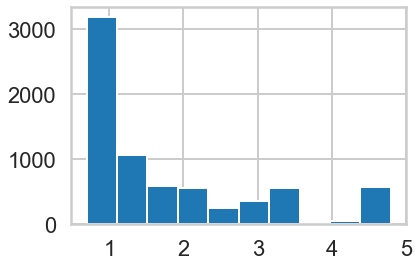

In [279]:
plt.hist(minights_log)

In [281]:
X_n.shape

(7224, 8)

Both logs seem better distributed so we will try enhancing the model with log variables 1 by 1

In [1297]:
#Adding log transformed variables to X dataset

In [291]:
X_n2 = X_n

In [293]:
X_n2['minnight'] = np.log(X_n2.minimum_nights+1)
X_n2 = X_n2.drop(['minimum_nights','price'],axis =1)

In [295]:
y.shape
X_n2.shape

(7224, 7)

In [296]:
#checking for cross val scores using new dataset with 1 new log variable for number of reviews
scores_lr_n2 = cross_val_score(LinearRegression(),X_n2,y,cv = 10, scoring = 'neg_mean_absolute_error')
print(scores_lr_n2)
np.mean(scores_lr_n2)*-1

[ -39.14803029  -38.08111408  -29.96936936  -33.9464946   -50.42884936
  -52.07589792  -36.53492708  -26.42879189  -60.32898776 -138.30214499]


50.52446073168891

**Predicting an absolute price for a listing may not be most relevant for the business as there is definite error in prediction. So we want to predict confidence intervals for each datapoint so that the Airbnb can use it with more confidence either to show customers the estimated price range for their selected room type, neighbour hood and length of stay or to hosts who want to list their apartments on the platform**

To solve for this,I will attempt to predict intervals using gradient boosting regressor

For the lower prediction, use GradientBoostingRegressor(loss=
"quantile", alpha=lower_quantile) with lower_quantile representing the lower bound, say 0.1 for the 10th percentile
For the upper prediction, use the GradientBoostingRegressor(loss=
"quantile", alpha=upper_quantile) with upper_quantile representing the upper bound, say 0.9 for the 90th percentile
For the mid prediction, use GradientBoostingRegressor(loss="quantile", alpha=0.5) which predicts the median, or the default loss="ls" (for least squares) which predicts the mean. The example in the docs uses the latter approach, and so will we.

In [297]:
from sklearn.ensemble import GradientBoostingRegressor
# Set lower and upper quantile
LOWER_ALPHA = 0.1
UPPER_ALPHA = 0.9
# Each model has to be separate
lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)
# The mid model will use the default loss
mid_model = GradientBoostingRegressor(loss="ls")
upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)

In [298]:
#Making sample datasets for training gbr
X2_train, X2_test, y2_train, y2_test = train_test_split(X_n2, y, test_size=0.3, random_state=101)

In [299]:
# Fit models
lower_model.fit(X2_train, y2_train)
mid_model.fit(X2_train, y2_train)
upper_model.fit(X2_train, y2_train)
# Record actual values on test set
predictions = pd.DataFrame(y2_test)
# Predict
predictions['lower'] = lower_model.predict(X2_test)
predictions['mid'] = mid_model.predict(X2_test)
predictions['upper'] = upper_model.predict(X2_test)

In [300]:
print(predictions.head())

      price       lower         mid       upper
4430    139  121.650540  224.495834  319.126777
5846    200  116.985432  193.458565  272.448115
2858     94   89.742501  124.443703  208.308089
3059    100   99.812639  190.440914  274.845458
3198    100  101.297151  170.478029  247.723798


In [301]:
#checking for cross val scores using gradient boosting regressor alpa = median
scores_lr_gbr = cross_val_score(GradientBoostingRegressor(loss="ls"),X_n2,y,cv = 10, scoring = 'neg_mean_absolute_error')
print(scores_lr_gbr)
np.mean(scores_lr_gbr)*-1

[ -50.39225156  -30.51021547  -26.57529785  -32.28890499  -49.62377344
  -52.0569209   -38.56387473  -30.10003459  -55.06350401 -131.91645521]


49.709123275386084

In [302]:
#checking for cross val scores using gradient boosting regressor alpa = lowe alpha
scores_lr_gbr_la = cross_val_score(GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA),X_n2,y,cv = 10, scoring = 'neg_mean_absolute_error')
print(scores_lr_gbr_la)
np.mean(scores_lr_gbr_la)*-1

[ -17.16398918  -12.53665028  -23.14631477  -35.40129868  -34.20090923
  -35.07805224  -54.85605411  -83.82591429 -123.5269559  -188.09756526]


60.783370395339986

In [235]:
#checking for cross val scores using gradient boosting regressor alpa = lowe alpha
scores_lr_gbr_ua = cross_val_score(GradientBoostingRegressor(loss="quantile",                   
                                        alpha=UPPER_ALPHA),X_n2,y,cv = 10, scoring = 'neg_mean_absolute_error')
print(scores_lr_gbr_ua)
np.mean(scores_lr_gbr_ua)*-1

[-112.03663349  -80.25440383  -78.6087677   -92.08231404 -114.22816091
 -125.47853006 -111.60295255  -88.23762435  -58.24829345  -75.91369043]


93.66913707875777

In [303]:
X_n2.shape

(7224, 7)

In [304]:
y.shape

(7224,)

lower alpha and upper alpha are obviously higher as they are upper and lower level limits for the quartile and the error from the mean will become higher

**LITERATURE REVIEW ON PREDICTION INTERVAL**
https://machinelearningmastery.com/prediction-intervals-for-machine-learning/

A prediction interval is calculated as some combination of the estimated variance of the model and the variance of the outcome variable.
Prediction intervals are easy to describe, but difficult to calculate in practice.
In simple cases like linear regression, we can estimate the confidence interval directly.
In the cases of nonlinear regression algorithms, such as artificial neural networks, it is a lot more challenging and requires the choice and implementation of specialized techniques. General techniques such as the bootstrap resampling method can be used, but are computationally expensive to calculate.


The paper “A Comprehensive Review of Neural Network-based Prediction Intervals and New Advances” provides a reasonably recent study of prediction intervals for nonlinear models in the context of neural networks. The following list summarizes some methods that can be used for prediction uncertainty for nonlinear machine learning models:

The Delta Method, from the field of nonlinear regression.
The Bayesian Method, from Bayesian modeling and statistics.
The Mean-Variance Estimation Method, using estimated statistics.
The Bootstrap Method, using data resampling and developing an ensemble of models.
We can make the calculation of a prediction interval concrete with a worked example in the next section.

In [305]:
from numpy.random import randn
from numpy.random import seed
from numpy import power
from numpy import sqrt
from numpy import mean
from numpy import std
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot

In [306]:
#Splitting dataset for this new model
X3_train, X3_test, y3_train, y3_test = train_test_split(X_n2, y, test_size=0.3, random_state=101)


In [307]:
lm.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [308]:
predicts = lm.predict(X3_test)
X3_airbnb = pd.DataFrame({
        'y_actual': np.array(y3_test).flatten(),
        'yhat': predicts.flatten()})
X3_airbnb.head()

,y_actual,yhat
0,139,207.005961
1,200,206.697276
2,94,159.712774
3,100,162.337063
4,100,171.970697


In [310]:
yhat = X3_airbnb['yhat']

In [311]:
y_act = X3_airbnb['y_actual']

In [315]:
y_out = y_act[0]

In [316]:
print(y_out)

139


In [317]:
yhat_out = yhat[0]

In [318]:
print(yhat_out)

207.00596102887397


In [323]:
interval = []
lower = []
upper = []

# estimate stdev of yhat
sum_errs = arraysum((y_act - yhat)**2)
stdev = sqrt(1/(len(y_act)-2) * sum_errs)

# calculate prediction interval
interval = 1.96 * stdev
print('Prediction Interval: %.3f' % interval)



Prediction Interval: 112.784


In [324]:
len(X3_airbnb)

2168

In [325]:
 param_range_new = list(range(0,len(X3_airbnb)))

In [331]:

for i in  param_range_new:
    y_fout = y_act[i]
    lower_i, upper_i = y_fout - interval, y_fout + interval
    lower.append(lower_i)
    upper.append(upper_i)
    
#print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
#print('True value: %.3f' % y_out)
#print('True value: %.3f' % yhat_out)

In [338]:
#Making a dataframe with predicted value, lower and upper values

y_final = pd.DataFrame({'Actual Price': y_act,'Predicted Price': yhat,'lower prediction range':lower,'upper prediction range':upper})

In [339]:
y_final.head()

,Actual Price,Predicted Price,lower prediction range,upper prediction range
0,139,207.005961,26.216455,251.783545
1,200,206.697276,87.216455,312.783545
2,94,159.712774,-18.783545,206.783545
3,100,162.337063,-12.783545,212.783545
4,100,171.970697,-12.783545,212.783545


** Y_Final is the New price prediction with lower and upper range with +/- 2 standard deviations**